In [ ]:
import pandas as pd

# Tải dữ liệu từ tệp CSV với error_bad_lines=False để bỏ qua các dòng lỗi
df = pd.read_csv('Training_Data_5.csv', encoding='ISO-8859-1')

# Hiện thị 5 hàng đầu tiên của dữ liệu
print(df.head())
# Xem thông tin tổng quan
print(df.info())
# KT phân phối chuẩn
print(df.describe())

<ipython-input-3-988e80608649>:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Training_Data_5.csv', encoding='ISO-8859-1')


   Id       Income   Age  Experience Unnamed: 4 House_Ownership Car_Ownership  \
0   1    1303834.0  23.0          30     single          rented            no   
1   2    7574516.0  40.0          10     single          rented            no   
2   3    3991815.0  66.0          42    married          rented            no   
3   4    6256451.0  41.0           2     single          rented           yes   
4   5  576887154.0  47.0          11     single          rented            no   

            Profession                             CITY  CURRENT_JOB_YRS  \
0  Mechanical_engineer              Rewa,Madhya_Pradesh                3   
1   Software_Developer            Parbhani, Maharashtra                9   
2     Technical_writer                Alappuzha, Kerala                4   
3   Software_Developer              Bhubaneswar, Odisha                2   
4        Civil_servant  Tiruchirappalli[10], Tamil_Nadu                3   

   CURRENT_HOUSE_YRS Risk_Flag Extra_Notes  
0          

In [ ]:
# Thêm tiêu để cho cột bị thiếu
df.rename(columns={'Unnamed: 4': 'Married/Single'}, inplace=True)

# Kiểm tra lại tên cột
print(df.columns)

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag', 'Extra_Notes'],
      dtype='object')


In [ ]:
#Kiểm tra các giá trị thiếu
print("\nSố lượng giá trị thiếu trong mỗi cột:")
print(df.isna().sum())


Số lượng giá trị thiếu trong mỗi cột:
Id                      0
Income                  0
Age                   544
Experience              0
Married/Single         20
House_Ownership      5456
Car_Ownership        5748
Profession              0
CITY                    0
CURRENT_JOB_YRS         0
CURRENT_HOUSE_YRS       0
Risk_Flag               0
Extra_Notes             0
dtype: int64


In [ ]:
# Xử lý các giá trị thiếu trong các cột Age,Married/Single,House_Ownership
df['Age'] = df['Age'].fillna(df['Age'].median()) # Dùng trùng vị thay thế cho các ô trống trong cột
df.dropna(subset=['Married/Single'], inplace=True) # Tiến hành xóa các ô trống
if df['House_Ownership'].notna().any():
    df['House_Ownership'] = df['House_Ownership'].fillna(df['House_Ownership'].mode()[0])
if df['Car_Ownership'].notna().any(): # Removed the extra space in 'Car_Ownership '
    df['Car_Ownership'] = df['Car_Ownership'].fillna(df['Car_Ownership'].mode()[0]) # Removed the extra space in 'Car_Ownership '

# Kiểm tra lại xem còn thiếu không
print(df.isnull().sum())

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
Extra_Notes          0
dtype: int64


In [ ]:
# Tách cột CITY thành City và State
df[['City', 'STATE']] = df['CITY'].str.split(',', n=1, expand=True)

if 'STATE' not in df.columns:
    df['STATE'] = None

# Bỏ cột 'CITY' ban đầu
df.drop('CITY', axis=1, inplace=True) # Thêm dòng này để bỏ cột 'CITY'

# Kiểm tra lại
print(df.head())

   Id       Income   Age  Experience Married/Single House_Ownership  \
0   1    1303834.0  23.0          30         single          rented   
1   2    7574516.0  40.0          10         single          rented   
2   3    3991815.0  66.0          42        married          rented   
3   4    6256451.0  41.0           2         single          rented   
4   5  576887154.0  47.0          11         single          rented   

  Car_Ownership           Profession  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  \
0            no  Mechanical_engineer                3                 13   
1            no   Software_Developer                9                 13   
2            no     Technical_writer                4                 10   
3           yes   Software_Developer                2                 12   
4            no        Civil_servant                3                 14   

  Risk_Flag Extra_Notes                 City           STATE  
0      safe        none                 Rewa  Madhya_

In [ ]:
# Kiểm tra có bao nhiêu dòng trùng nhau
print("Số dòng trùng nhau:", df.duplicated().sum())

Số dòng trùng nhau: 158


In [ ]:
# Xoá dòng trùng nhau, giữ lại dòng đầu tiên
df.drop_duplicates(inplace=True)

In [ ]:
# In ra chỉ số dòng experriece <0
num_invalid_exp = (df['Experience'] < 0).sum()
print(f"Các dòng có Experience < 0: {num_invalid_exp}")


Các dòng có Experience < 0: 236


In [ ]:
# Tính trung vị các giá trị Experience hợp lệ (>= 0)
median_exp = df.loc[df['Experience'] >= 0, 'Experience'].median()

# Thay các giá trị âm bằng trung vị
df.loc[df['Experience'] < 0, 'Experience'] = median_exp

# Kiểm tra lại cột experience
count = (df['Experience'] < 0).sum()
print(f"Số dòng có Experience < 0 là: {count}")

Số dòng có Experience < 0 là: 0


In [ ]:
#Kiểm tra các cột không đồng nhất dữ liệu
data_cols = df.columns
for col in data_cols:
    # Check if the column is of object type before applying lower()
    if df[col].dtype == 'object':
        unique_vals = df[col].dropna().unique()
        lower_vals = [val.lower() if isinstance(val, str) else val for val in unique_vals]
        if len(set(lower_vals)) < len(set(unique_vals)):
            print(f" Cột '{col}' Dữ liệu không đồng nhất")
            print(unique_vals)
            print("-" * 40)

 Cột 'Married/Single' Dữ liệu không đồng nhất
['single' 'married' '            single' 'Single' 'Married'
 '             single' '                single' 'singl']
----------------------------------------
 Cột 'House_Ownership' Dữ liệu không đồng nhất
['rented' 'norent_noown' '           rented' 'owned' 'rENted' 'renTEd'
 'renTed' 'reNted' 'REnted' 'Rented' 'rEnted' 'renteD' 'rentED']
----------------------------------------
 Cột 'Risk_Flag' Dữ liệu không đồng nhất
['safe' 'Risky' '       safe' '         safe' '         Risky'
 '       Risky' '     safe' 'riskY' '          safe' '        safe'
 'ris ky' '           safe' '         ris ky' 'ri      sky' 'r isky'
 'risky' 's Afe' 'SAfe' 'SAf  e' 'saf e']
----------------------------------------


In [ ]:
import re

# Hàm chuẩn hóa chuỗi: về chữ thường, bỏ khoảng trắng đầu cuối, xoá khoảng trắng giữa các chữ
def normalize_string(s):
    return re.sub(r'\s+', '', str(s).strip().lower())

# Áp dụng chuẩn hóa
df['Married/Single'] = df['Married/Single'].apply(normalize_string)
df['House_Ownership'] = df['House_Ownership'].apply(normalize_string)
df['Risk_Flag'] = df['Risk_Flag'].apply(normalize_string)

# Map lại về giá trị đúng (nếu có các sai lệch nhẹ như "singl" hoặc "noownnorent")
df['Married/Single'] = df['Married/Single'].replace({
    'single': 'single',
    'singl': 'single',
    'married': 'married'
})

df['House_Ownership'] = df['House_Ownership'].replace({
    'rented': 'rented',
    'norent_noown': 'norent_noown',
    'owned': 'owned',
})

df['Risk_Flag'] = df['Risk_Flag'].replace({
    'risky': 'risky',
    'safe': 'safe'
})

# Giữ lại các hàng hợp lệ
df = df[
    df['Married/Single'].isin(['single', 'married']) &
    df['House_Ownership'].isin(['rented', 'norent_noown', 'owned']) &
    df['Risk_Flag'].isin(['risky', 'safe'])
]

# Kiểm tra kết quả
print("Giá trị cột 'Married/Single' sau chuẩn hóa:", df['Married/Single'].unique())
print("Giá trị cột 'House_Ownership' sau chuẩn hóa:", df['House_Ownership'].unique())
print("Giá trị cột 'Risk_Flag' sau chuẩn hóa:", df['Risk_Flag'].unique())


Giá trị cột 'Married/Single' sau chuẩn hóa: ['single' 'married']
Giá trị cột 'House_Ownership' sau chuẩn hóa: ['rented' 'norent_noown' 'owned']
Giá trị cột 'Risk_Flag' sau chuẩn hóa: ['safe' 'risky']


In [ ]:
# Chuyển các giá trị không hợp lệ trong Income thành Nan
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')
# Thay các giá trị(NaN)thành giá trị median, sau đó chuyển sang kiểu int
df['Income'] = df['Income'].fillna(df['Income'].median()).astype(int)
df['Age'] = df['Age'].astype(int)
df['Experience'] = df['Experience'].astype(int)
# Kiểm tra lại kiểu dữ liệu
print(df.dtypes)

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag            object
Extra_Notes          object
City                 object
STATE                object
dtype: object


In [ ]:
# Xóa khoảng trắng ở đầu và cuối cho tất cả các cột object
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()


In [ ]:
# Xử lý các ký tự không hợp lệ trong cột City
df['City'] = df['City'].str.replace(r'\[.*?\]', '', regex=True)

# In ra 10 dòng đầu tiên của cột City sau khi xử lý
print("10 dòng đầu tiên của cột City sau khi làm sạch:")
print(df['City'].head(10))




10 dòng đầu tiên của cột City sau khi làm sạch:
0               Rewa
1           Parbhani
2          Alappuzha
3        Bhubaneswar
4    Tiruchirappalli
5            Jalgaon
6           Tiruppur
7           Jamnagar
8               Kota
9         Karimnagar
Name: City, dtype: object


In [ ]:
# Xóa cột 'Extra_Notes' và 'Id' nếu tồn tại
cols_to_drop = ['Extra_Notes', 'Id']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

# Kiểm tra lại danh sách các cột
print("Danh sách các cột còn lại:", df.columns.tolist())

Danh sách các cột còn lại: ['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag', 'City', 'STATE']


In [ ]:
# KT phân phối chuẩn
print(df.describe())

             Income            Age     Experience  CURRENT_JOB_YRS  \
count  2.519500e+05  251950.000000  251950.000000    251950.000000   
mean   6.586715e+08      49.960564      10.085350         6.333963   
std    5.217090e+10      17.045290       6.002009         3.647106   
min    1.031000e+04      21.000000       0.000000         0.000000   
25%    2.570783e+06      35.000000       5.000000         3.000000   
50%    5.166669e+06      50.000000      10.000000         6.000000   
75%    7.715562e+06      65.000000      15.000000         9.000000   
max    5.566620e+12      79.000000      49.000000        14.000000   

       CURRENT_HOUSE_YRS  
count      251950.000000  
mean           11.997837  
std             1.399041  
min            10.000000  
25%            11.000000  
50%            12.000000  
75%            13.000000  
max            14.000000  


In [ ]:
# Kiểm tra logic giữa các cột
# 1. Experience >= Age
invalid_experience_age = df[df['Experience'] >= df['Age']]
print("\nSố dòng có lỗi Experience >= Age:", len(invalid_experience_age))
print(invalid_experience_age[['Age', 'Experience']].head())

# Xóa các dòng có Experience >= Age
df = df[df['Experience'] < df['Age']]
print(" Số dòng còn lỗi Experience >= Age:", len(df[df['Experience'] >= df['Age']]))



Số dòng có lỗi Experience >= Age: 9
     Age  Experience
0     23          30
234   22          25
373   46          49
422   25          30
460   28          30
 Số dòng còn lỗi Experience >= Age: 0


In [ ]:
# 2. Age - Experience < 18
invalid_age_experience = df[df['Age'] - df['Experience'] < 18]
print("\nSố dòng có lỗi Age - Experience < 18:", len(invalid_age_experience))
print(invalid_age_experience[['Age', 'Experience']].head())

# Điều chỉnh Experience sao cho Age - Experience >= 18
df.loc[df["Age"] - df["Experience"] < 18, "Experience"] = df["Age"] - 18
print("Số dòng còn lỗi Age - Experience < 18 sau điều chỉnh:", len(df[df["Age"] - df["Experience"] < 18]))




Số dòng có lỗi Age - Experience < 18: 32080
    Age  Experience
8    24          17
9    23          12
24   23          15
45   25          16
65   27          12
Số dòng còn lỗi Age - Experience < 18 sau điều chỉnh: 0


In [ ]:
# 3. # CURRENT_JOB_YRS > Experience
invalid_job_yrs = df[df['CURRENT_JOB_YRS'] > df['Experience']]
print("\nSố dòng có CURRENT_JOB_YRS > Experience:", len(invalid_job_yrs))
print(invalid_job_yrs[['CURRENT_JOB_YRS', 'Experience']].head())

# Xử lí
df.loc[df['CURRENT_JOB_YRS'] > df['Experience'], 'CURRENT_JOB_YRS'] = df['Experience']
print("Số dòng còn lỗi CURRENT_JOB_YRS > Experience sau điều chỉnh:", len(df[df['CURRENT_JOB_YRS'] > df['Experience']]))


Số dòng có CURRENT_JOB_YRS > Experience: 15965
    CURRENT_JOB_YRS  Experience
8                11           6
45               13           7
65               12           9
88               11           6
90               10           9
Số dòng còn lỗi CURRENT_JOB_YRS > Experience sau điều chỉnh: 0


In [ ]:
# Phân loại dữ liệu
numeric_cols = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
categorical_features = ['Profession', 'City', 'STATE', 'Married/Single', 'Car_Ownership', 'House_Ownership']

In [ ]:
# Hàm kiểm tra ngoại lai bằng IQR
def detect_outliers_iqr(df, numeric_cols):
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)]
    outlier_ratio = len(outliers)

    return outlier_ratio
# Kiểm tra tỷ lệ ngoại lai
print("Tỷ lệ ngoại lai:")
for col in numeric_cols:
    num_outliers = detect_outliers_iqr(df, col)
    print(f"- {col}: {num_outliers} ngoại lai")

Tỷ lệ ngoại lai:
- Income: 7790 ngoại lai
- Age: 0 ngoại lai
- Experience: 3 ngoại lai
- CURRENT_JOB_YRS: 0 ngoại lai
- CURRENT_HOUSE_YRS: 0 ngoại lai


In [ ]:
# Xử lý ngoại lai
def replace_outliers_iqr(df, numeric_cols, method='median'):
    Q1 = df[numeric_cols].quantile(0.25)  # Calculate Q1 for the column
    Q3 = df[numeric_cols].quantile(0.75)  # Calculate Q3 for the column
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if method == 'median':
        median_value = df[numeric_cols].median()
        df.loc[(df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound), numeric_cols] = median_value
        print(f"Cột {numeric_cols}: Các ngoại lai đã được thay thế bằng trung vị ({median_value}).")
    return df

# Thay thế ngoại lai
for col in ['Income', 'Experience']:
    df = replace_outliers_iqr(df, col, method='median')
    num_outliers = detect_outliers_iqr(df, col)
    print(f"Số ngoại lai còn lại ở cột {col}: {num_outliers}")

Cột Income: Các ngoại lai đã được thay thế bằng trung vị (5166669.0).
Số ngoại lai còn lại ở cột Income: 0
Cột Experience: Các ngoại lai đã được thay thế bằng trung vị (9.0).
Số ngoại lai còn lại ở cột Experience: 0


In [ ]:
df.to_csv('Cleaned_Data.csv', index=False)
print("Dữ liệu đã làm sạch được lưu vào 'Cleaned_Data.csv'")

Dữ liệu đã làm sạch được lưu vào 'Cleaned_Data.csv'


<ipython-input-86-8c97965520c6>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  safe_count = value_counts[0]
<ipython-input-86-8c97965520c6>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  risky_count = value_counts[1]


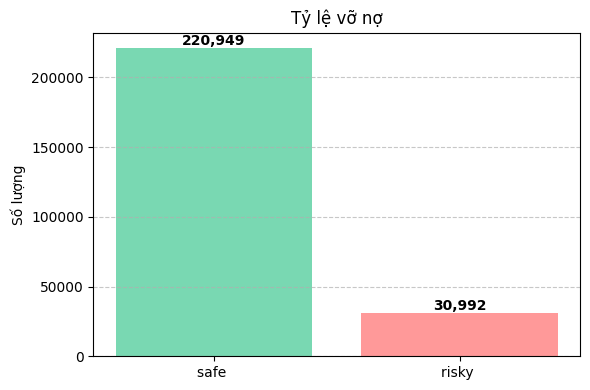

In [ ]:
# Trực quan hóa dữ liệu
import matplotlib.pyplot as plt

# Đếm số lượng từng lớp
value_counts = df['Risk_Flag'].value_counts()
safe_count = value_counts[0]
risky_count = value_counts[1]

safe_color = '#79D8B2'  # xanh lá pastel đậm hơn
risky_color = '#FF9999'  # đỏ nhạt

# Vẽ biểu đồ
plt.figure(figsize=(6, 4))
bars = plt.bar(['safe ', 'risky '], [safe_count, risky_count], color=[safe_color, risky_color])

# Hiển thị số lượng trên mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 100, f'{height:,}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Tỷ lệ vỡ nợ')
plt.ylabel('Số lượng')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-87-6a908020a14c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Risk_Flag", y="Income", data=df, palette="Set3")


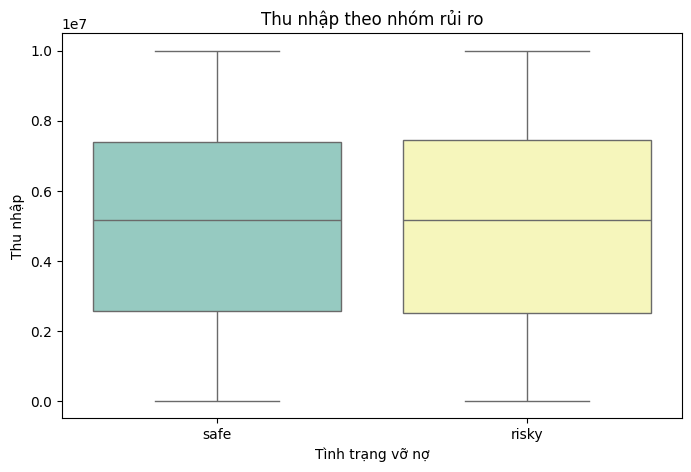

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.boxplot(x="Risk_Flag", y="Income", data=df, palette="Set3")
plt.title("Thu nhập theo nhóm rủi ro")
plt.xlabel("Tình trạng vỡ nợ")
plt.ylabel("Thu nhập")
plt.show()

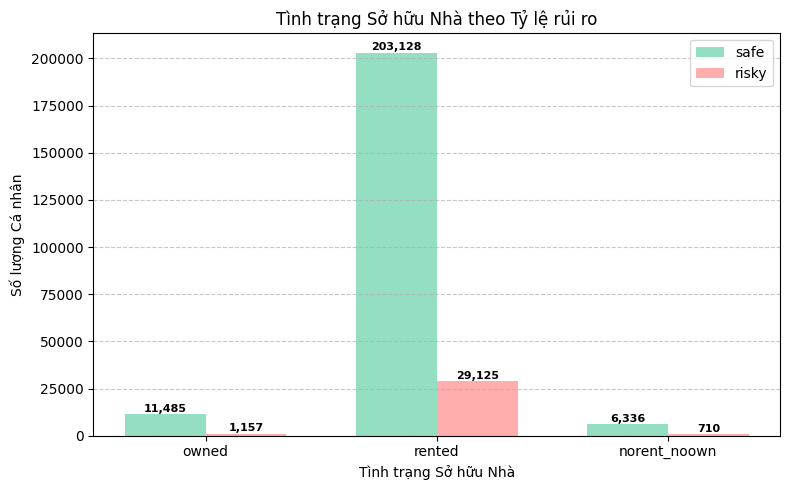

In [ ]:
 import numpy as np
 # Tính số lượng cho House_Ownership
house_counts = df.groupby(['House_Ownership', 'Risk_Flag']).size().unstack(fill_value=0)
house_categories = ['owned', 'rented', 'norent_noown']  # Đảm bảo thứ tự cố định
house_counts = house_counts.reindex(house_categories, fill_value=0)  # Sắp xếp theo thứ tự

# Thiết lập biểu đồ
plt.figure(figsize=(8, 5))
bar_width = 0.35
indices = np.arange(len(house_categories))
safe_color = '#79D8B2'  # Xanh lá pastel
risky_color = '#FF9999'  # Đỏ nhạt

# Vẽ cột cho nhóm safe và risky
safe_bars = plt.bar(indices, house_counts['safe'], bar_width, label='safe', color=safe_color, alpha=0.8)
risky_bars = plt.bar(indices + bar_width, house_counts['risky'], bar_width, label='risky', color=risky_color, alpha=0.8)

# Hiển thị số liệu trên cột
for bar in safe_bars + risky_bars:
    height = bar.get_height()
    if height > 0:  # Chỉ hiển thị nếu có giá trị
        plt.text(bar.get_x() + bar.get_width()/2, height + 50, f'{int(height):,}',
                 ha='center', va='bottom', fontsize=8, fontweight='bold')

# Tùy chỉnh biểu đồ
plt.xlabel('Tình trạng Sở hữu Nhà')
plt.ylabel('Số lượng Cá nhân')
plt.title('Tình trạng Sở hữu Nhà theo Tỷ lệ rủi ro')
plt.xticks(indices + bar_width / 2, ['owned', 'rented', 'norent_noown'], rotation=0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

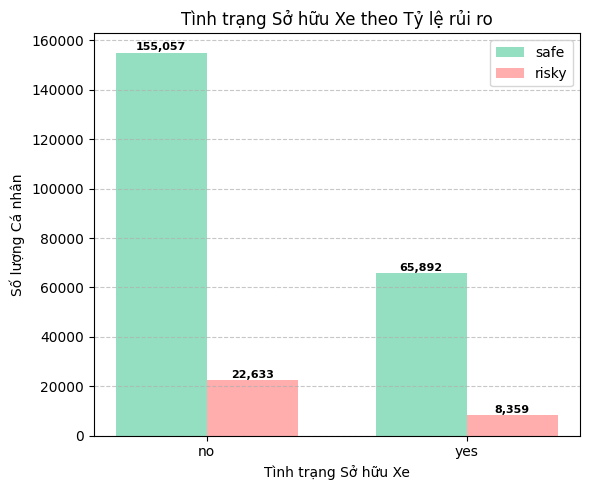

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Tính số lượng cho Car_Ownership (chỉ có 'yes' và 'no')
car_counts = df.groupby(['Car_Ownership', 'Risk_Flag']).size().unstack(fill_value=0)
car_categories = ['no', 'yes']  # Đảm bảo thứ tự cố định (hoặc ['yes', 'no'] tùy theo ý muốn)
car_counts = car_counts.reindex(car_categories, fill_value=0)  # Sắp xếp theo thứ tự

# Thiết lập biểu đồ
plt.figure(figsize=(6, 5))
bar_width = 0.35
indices = np.arange(len(car_categories))
safe_color = '#79D8B2'  # Xanh lá pastel
risky_color = '#FF9999'  # Đỏ nhạt

# Vẽ cột cho nhóm safe và risky
safe_bars = plt.bar(indices, car_counts['safe'], bar_width, label='safe', color=safe_color, alpha=0.8)
risky_bars = plt.bar(indices + bar_width, car_counts['risky'], bar_width, label='risky', color=risky_color, alpha=0.8)

# Hiển thị số liệu trên cột
for bar in safe_bars + risky_bars:
    height = bar.get_height()
    if height > 0:  # Chỉ hiển thị nếu có giá trị
        plt.text(bar.get_x() + bar.get_width()/2, height + 50, f'{int(height):,}',
                 ha='center', va='bottom', fontsize=8, fontweight='bold')

# Tùy chỉnh biểu đồ
plt.xlabel('Tình trạng Sở hữu Xe')
plt.ylabel('Số lượng Cá nhân')
plt.title('Tình trạng Sở hữu Xe theo Tỷ lệ rủi ro')
plt.xticks(indices + bar_width / 2, ['no', 'yes']) # Hoặc ['yes', 'no']
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

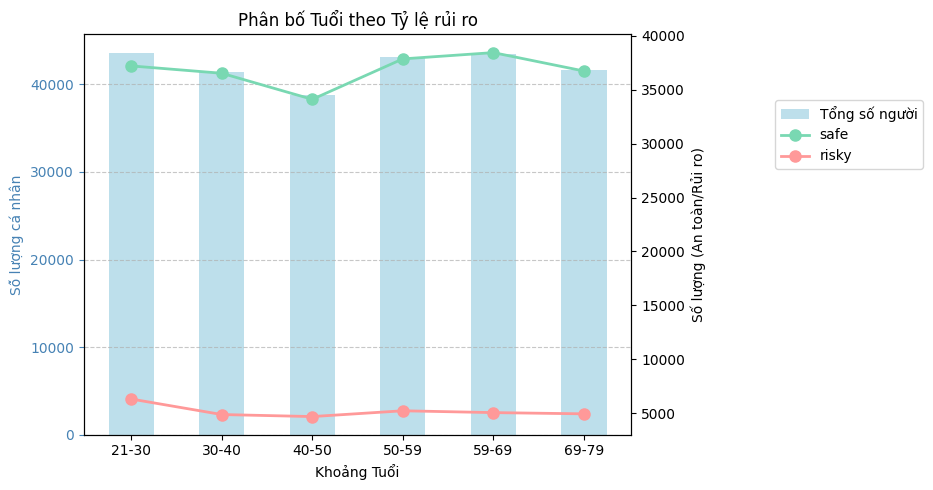

In [ ]:
import matplotlib.pyplot as plt

# Tạo các khoảng tuổi
age_min, age_max = df['Age'].min(), df['Age'].max()
bins = np.linspace(age_min, age_max, 7)  # Tạo 6 khoảng tuổi
bin_labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]

# Tính số lượng cho mỗi khoảng tuổi
total_counts, _ = np.histogram(df['Age'], bins=bins)
safe = df[df['Risk_Flag'] == 'safe']['Age']
risky = df[df['Risk_Flag'] == 'risky']['Age']
safe_counts, _ = np.histogram(safe, bins=bins)
risky_counts, _ = np.histogram(risky, bins=bins)

# Thiết lập biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 5))  # Mở rộng kích thước biểu đồ
bar_width = 0.5
indices = np.arange(len(bin_labels))
bar_color = '#4682B4'  # Xanh dương đậm
safe_color = '#79D8B2'  # Xanh pastel cho đường safe
line_color = '#FF9999'  # Đỏ nhạt cho đường risky

# Vẽ cột cho tổng số người
bars = ax1.bar(indices, total_counts, bar_width, label='Tổng số người', color='#ADD8E6', alpha=0.8)

# Tạo trục y thứ hai cho đường
ax2 = ax1.twinx()
safe_line = ax2.plot(indices, safe_counts, marker='o', label='safe', color=safe_color, linewidth=2, markersize=8)[0]
risky_line = ax2.plot(indices, risky_counts, marker='o', label='risky', color=line_color, linewidth=2, markersize=8)[0]

# Tùy chỉnh biểu đồ
ax1.set_xlabel('Khoảng Tuổi')
ax1.set_ylabel('Số lượng cá nhân', color=bar_color)
ax2.set_ylabel('Số lượng (An toàn/Rủi ro)', color='black')  # Màu đen để trung tính vì có 2 đường
ax1.set_title('Phân bố Tuổi theo Tỷ lệ rủi ro')
ax1.set_xticks(indices)
ax1.set_xticklabels(bin_labels)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Tùy chỉnh màu trục y
ax1.tick_params(axis='y', colors=bar_color)
ax2.tick_params(axis='y', colors='black')

# Kết hợp chú thích từ cả hai trục và đặt bên ngoài
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='center left', bbox_to_anchor=(1.25, 0.75))

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

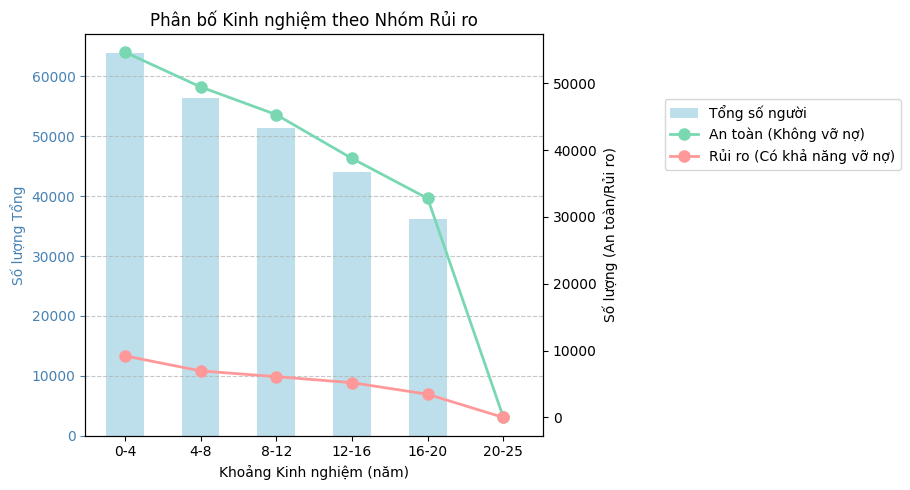

In [ ]:
import matplotlib.pyplot as plt
# Tạo các khoảng kinh nghiệm
exp_min, exp_max = df['Experience'].min(), df['Experience'].max()
bins = np.linspace(exp_min, exp_max, 7)  # Tạo 6 khoảng kinh nghiệm
bin_labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]

# Tính số lượng cho mỗi khoảng kinh nghiệm
total_counts, _ = np.histogram(df['Experience'], bins=bins)
safe = df[df['Risk_Flag'] == 'safe']['Experience']
risky = df[df['Risk_Flag'] == 'risky']['Experience']
safe_counts, _ = np.histogram(safe, bins=bins)
risky_counts, _ = np.histogram(risky, bins=bins)

# Thiết lập biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 5))  # Kích thước biểu đồ đủ rộng cho chú thích
bar_width = 0.5
indices = np.arange(len(bin_labels))
bar_color = '#4682B4'  # Xanh dương đậm
safe_color = '#79D8B2'  # Xanh pastel cho đường safe
line_color = '#FF9999'  # Đỏ nhạt cho đường risky

# Vẽ cột cho tổng số người
bars = ax1.bar(indices, total_counts, bar_width, label='Tổng số người', color='#ADD8E6', alpha=0.8)

# Tạo trục y thứ hai cho đường
ax2 = ax1.twinx()
safe_line = ax2.plot(indices, safe_counts, marker='o', label='An toàn (Không vỡ nợ)', color=safe_color, linewidth=2, markersize=8)[0]
risky_line = ax2.plot(indices, risky_counts, marker='o', label='Rủi ro (Có khả năng vỡ nợ)', color=line_color, linewidth=2, markersize=8)[0]

# Tùy chỉnh biểu đồ
ax1.set_xlabel('Khoảng Kinh nghiệm (năm)')
ax1.set_ylabel('Số lượng Tổng', color=bar_color)
ax2.set_ylabel('Số lượng (An toàn/Rủi ro)', color='black')  # Màu đen để trung tính vì có 2 đường
ax1.set_title('Phân bố Kinh nghiệm theo Nhóm Rủi ro')
ax1.set_xticks(indices)
ax1.set_xticklabels(bin_labels)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Tùy chỉnh màu trục y
ax1.tick_params(axis='y', colors=bar_color)
ax2.tick_params(axis='y', colors='black')

# Kết hợp chú thích từ cả hai trục và đặt bên ngoài
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='center left', bbox_to_anchor=(1.25, 0.75
))

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

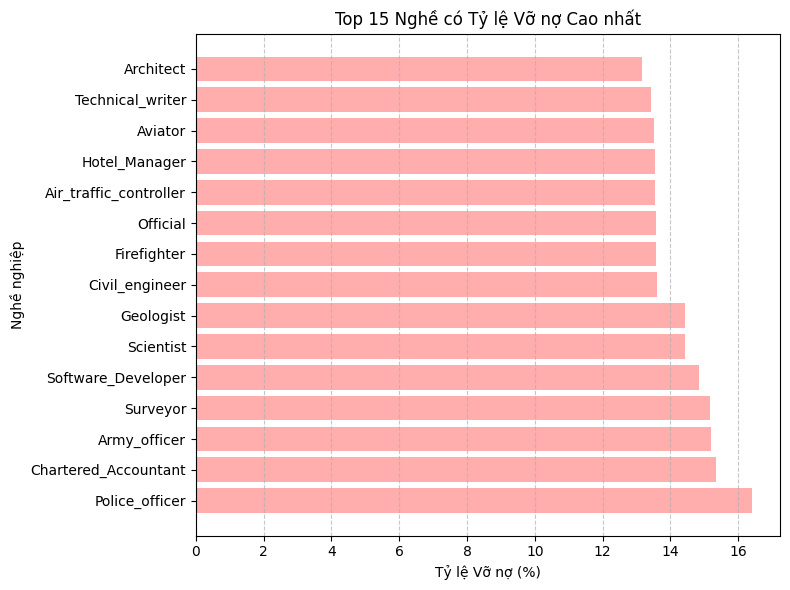

In [ ]:
import matplotlib.pyplot as plt
# Tính tỷ lệ vỡ nợ theo nghề nghiệp
# Tổng số người trong mỗi nghề
total_by_profession = df.groupby('Profession').size()
# Số lượng "risky" trong mỗi nghề
risky_by_profession = df[df['Risk_Flag'] == 'risky'].groupby('Profession').size()
# Tỷ lệ vỡ nợ (%)
risk_ratio = (risky_by_profession / total_by_profession * 100).fillna(0)
# Sắp xếp theo tỷ lệ giảm dần và lấy top 15
risk_ratio = risk_ratio.sort_values(ascending=False).head(15)

# Thiết lập biểu đồ
plt.figure(figsize=(8, 6))  # Chiều cao giảm vì chỉ có 15 nghề
bar_color = '#FF9999'  # Đỏ nhạt cho tỷ lệ vỡ nợ

# Vẽ biểu đồ cột ngang
bars = plt.barh(risk_ratio.index, risk_ratio, color=bar_color, alpha=0.8)

# Tùy chỉnh biểu đồ
plt.xlabel('Tỷ lệ Vỡ nợ (%)')
plt.ylabel('Nghề nghiệp')
plt.title('Top 15 Nghề có Tỷ lệ Vỡ nợ Cao nhất')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

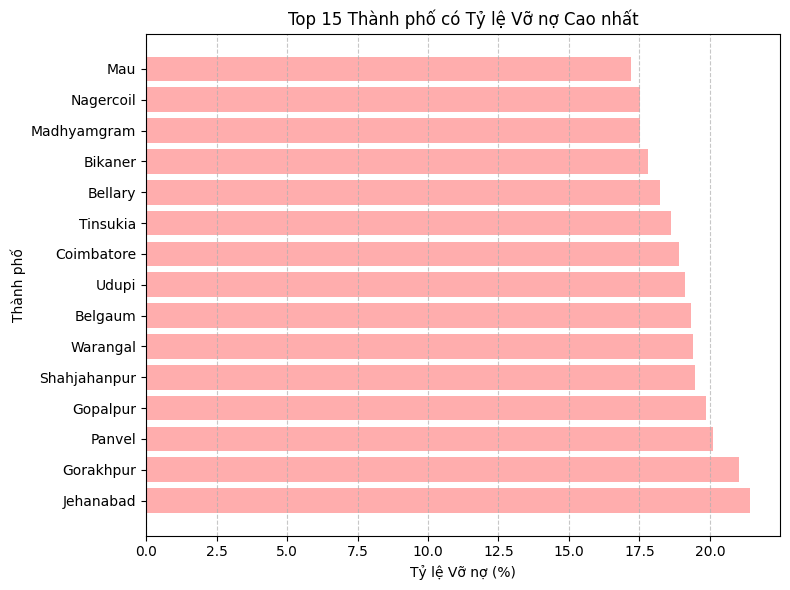

In [ ]:
import matplotlib.pyplot as plt
# Tính tỷ lệ vỡ nợ theo thành phố
# Tổng số người trong mỗi thành phố
total_by_city = df.groupby('City').size()
# Số lượng "risky" trong mỗi thành phố
risky_by_city = df[df['Risk_Flag'] == 'risky'].groupby('City').size()
# Tỷ lệ vỡ nợ (%)
risk_ratio = (risky_by_city / total_by_city * 100).fillna(0)
# Sắp xếp theo tỷ lệ giảm dần và lấy top 15
risk_ratio = risk_ratio.sort_values(ascending=False).head(15)

# Thiết lập biểu đồ
plt.figure(figsize=(8, 6))  # Chiều cao phù hợp cho 15 thành phố
bar_color = '#FF9999'  # Đỏ nhạt cho tỷ lệ vỡ nợ

# Vẽ biểu đồ cột ngang
bars = plt.barh(risk_ratio.index, risk_ratio, color=bar_color, alpha=0.8)


# Tùy chỉnh biểu đồ
plt.xlabel('Tỷ lệ Vỡ nợ (%)')
plt.ylabel('Thành phố')
plt.title('Top 15 Thành phố có Tỷ lệ Vỡ nợ Cao nhất')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()